In [1]:
from pathlib import Path
from amc_parser.motion import MotionCapture
import matplotlib.pyplot as plt

asf_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02.asf'
amc_path = Path.cwd() / 'mocap' / 'subjects' / '02' / '02_02.amc'

mocap = MotionCapture(asf_path, amc_path)
df = mocap.as_dataframe()
df

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.6.1 (SDL 2.30.7, Python 3.12.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


,frame,time,root_tx,root_ty,root_tz,root_rx,root_ry,root_rz,lfemur_rx,lfemur_ry,...,rhumerus_rx,rhumerus_ry,rhumerus_rz,rradius_rx,rwrist_ry,rhand_rx,rhand_rz,rfingers_rx,rthumb_rx,rthumb_rz
0,0,0.000000,0.539458,0.904274,-2.296899,-0.2216,-5.68439,-5.60634,-40.7617,0.052942,...,-11.6039,22.2986,-83.518,57.6577,-21.5344,-31.0564,21.5082,7.12502,-4.33755,-8.42735
1,1,0.008333,0.54029,0.90293,-2.286277,0.151414,-6.08425,-6.02095,-41.247,-0.42686,...,-10.8785,23.0644,-83.1691,58.0401,-21.2406,-30.9158,21.2593,7.12502,-4.20181,-8.67896
2,2,0.016667,0.54131,0.901615,-2.275225,0.377493,-6.48713,-6.44745,-41.624,-0.862031,...,-11.1857,23.2668,-83.7817,58.4631,-20.8433,-31.2355,21.9224,7.12502,-4.51052,-8.00959
3,3,0.025000,0.542679,0.901232,-2.263242,0.347139,-6.86022,-6.24185,-41.5043,-1.39041,...,-9.60544,23.3949,-83.0099,58.7395,-20.6932,-31.6539,22.363,7.12502,-4.91452,-7.55998
4,4,0.033333,0.543885,0.901073,-2.250897,0.170873,-7.42645,-6.05237,-41.1533,-1.74566,...,-9.50603,23.6119,-83.0041,58.9966,-20.5296,-31.8203,22.1144,7.12502,-5.07525,-7.80486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,2.441667,0.576501,0.988862,1.681728,-4.87118,2.88453,-0.339539,10.6788,-1.84347,...,-47.4839,-1.02564,-91.7798,25.4129,-14.3059,-29.9456,20.7157,7.12502,-3.26487,-9.239
294,294,2.450000,0.575739,0.990182,1.697708,-5.44888,4.75533,-0.647548,13.0862,-2.18,...,-47.6971,-2.37239,-91.0821,23.2377,-13.3727,-30.012,21.0938,7.12502,-3.32904,-8.85996
295,295,2.458333,0.575462,0.990092,1.711125,-5.27492,5.56281,-0.511779,14.6187,-2.17744,...,-48.469,-3.77449,-90.2919,22.0622,-13.1089,-30.1947,21.4816,7.12502,-3.50545,-8.46936
296,296,2.466667,0.574966,0.989166,1.724666,-5.01797,6.38596,-0.487699,16.0851,-2.39625,...,-49.6274,-4.74261,-89.7214,21.3898,-12.8594,-29.9723,21.0275,7.12502,-3.2907,-8.92689


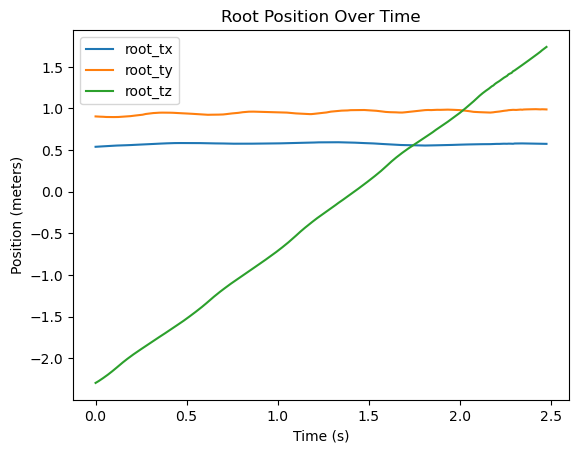

In [2]:
# plot the root_tx, root_ty, root_tz against time
df.plot(x='time', y=['root_tx', 'root_ty', 'root_tz'])
plt.xlabel('Time (s)')
plt.ylabel('Position (meters)')
plt.title('Root Position Over Time')
plt.legend(['root_tx', 'root_ty', 'root_tz'])
plt.show()

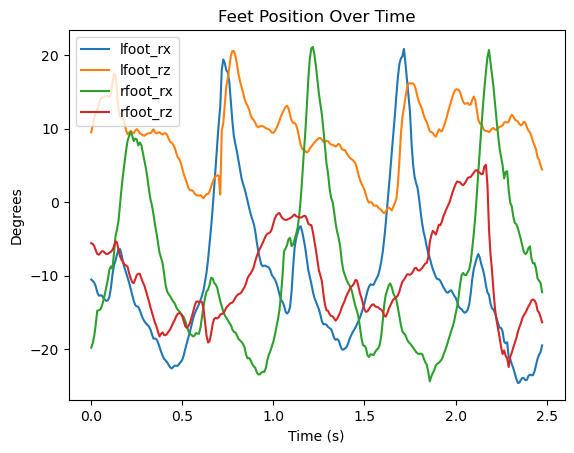

In [3]:
# Get the columns for the feet
lfoot_cols = mocap.get_columns_for_joint('lfoot')
rfoot_cols = mocap.get_columns_for_joint('rfoot')

# plot the left and right foot positions against time
foot_cols = lfoot_cols + rfoot_cols
df.plot(x='time', y=foot_cols)
plt.xlabel('Time (s)')
plt.ylabel('Degrees')
plt.title('Feet Position Over Time')
plt.legend(foot_cols)

